# Dog Breed Identification

[Dog Breed Identification](https://www.kaggle.com/c/dog-breed-identification)

## Action Plan
### 1. [Data Preparation and Preprocessing] Create Validation and Sample sets
### 2. [Data Preparation and Preprocessing] Rearrange image files into their respective directories 
### 3. Finetune and Train model
### 4. Generate predictions
### 5. Validate predictions
### 6. Submit predictions to Kaggle

## 3. Model Finetuning and Training

In [1]:
#Verify we are in the correct "Code" directory
#%cd "D:\Dropbox\Ted 2017\11A_技術\[TREND] Data Science and ML\[Tutorials] Kaggle\[Competitions] Kaggle Competitions\2017_Playground_Dog Breed Identification\Code"
%cd '~/kaggle/dog-breed-identification/code'
%pwd

/home/ubuntu/kaggle/dog-breed-identification/code


'/home/ubuntu/kaggle/dog-breed-identification/code'

In [2]:
#Create references to important directories we will use over and over
import os, sys
current_dir = os.getcwd()
CODE_HOME_DIR = current_dir
DATA_HOME_DIR = CODE_HOME_DIR + '/../input/'
print(CODE_HOME_DIR)
print(DATA_HOME_DIR)

/home/ubuntu/kaggle/dog-breed-identification/code
/home/ubuntu/kaggle/dog-breed-identification/code/../input/


In [3]:
#import modules
from importlib import reload

import utils; reload(utils)
from utils import *

import vgg16bn; reload(vgg16bn)
from vgg16bn import Vgg16BN; 

%matplotlib inline

Using TensorFlow backend.
/home/ubuntu/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Setup 

#### Setup Paths

In [4]:
%cd $DATA_HOME_DIR

#Set path to sample/ path if desired
path = DATA_HOME_DIR + '/' # + '/sample/' 
test_path = path + '/test/' #We use all the test data
results_path = path + '/results/'
train_path = path + '/train/'
valid_path = path + '/valid/'
model_path = path + '/models/'
if not os.path.exists(model_path): os.mkdir(model_path)

/home/ubuntu/kaggle/dog-breed-identification/input


## First training

In [40]:
vgg = Vgg16BN()
model = vgg.model

In [ ]:
batch_size=64

In [ ]:
#Finetune the model
batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, shuffle=False, batch_size=batch_size)
vgg.finetune(batches)

In [11]:
vgg.fit(batches, val_batches, epochs=1)

Epoch 1/1
 - 154s - loss: 8.7191 - acc: 0.1355 - val_loss: 8.7503 - val_acc: 0.2325


In [12]:
model.optimizer.lr = 1

In [13]:
vgg.fit(batches, val_batches, epochs=5)

Epoch 1/5
 - 130s - loss: 4.4816 - acc: 0.4315 - val_loss: 6.7601 - val_acc: 0.2645
Epoch 2/5
 - 130s - loss: 3.0723 - acc: 0.5897 - val_loss: 6.1630 - val_acc: 0.2890
Epoch 3/5
 - 130s - loss: 2.2047 - acc: 0.7055 - val_loss: 5.5872 - val_acc: 0.3175
Epoch 4/5
 - 130s - loss: 1.7284 - acc: 0.7682 - val_loss: 6.1303 - val_acc: 0.3090
Epoch 5/5
 - 131s - loss: 1.4387 - acc: 0.8068 - val_loss: 6.3541 - val_acc: 0.3385


In [14]:
model.optimizer.lr = 0.01

In [15]:
vgg.fit(batches, val_batches, epochs=10)

Epoch 1/10
 - 131s - loss: 1.3046 - acc: 0.8256 - val_loss: 6.5569 - val_acc: 0.3420
Epoch 2/10
 - 130s - loss: 1.1242 - acc: 0.8468 - val_loss: 6.7653 - val_acc: 0.3355
Epoch 3/10
 - 130s - loss: 1.0190 - acc: 0.8661 - val_loss: 6.4625 - val_acc: 0.3540
Epoch 4/10
 - 130s - loss: 0.9331 - acc: 0.8768 - val_loss: 6.6578 - val_acc: 0.3465
Epoch 5/10
 - 130s - loss: 0.8246 - acc: 0.8905 - val_loss: 6.6288 - val_acc: 0.3635
Epoch 6/10
 - 131s - loss: 0.7739 - acc: 0.8976 - val_loss: 7.0907 - val_acc: 0.3425
Epoch 7/10
 - 131s - loss: 0.7278 - acc: 0.9005 - val_loss: 6.9239 - val_acc: 0.3465
Epoch 8/10
 - 131s - loss: 0.7105 - acc: 0.9047 - val_loss: 7.2170 - val_acc: 0.3415
Epoch 9/10
 - 130s - loss: 0.6298 - acc: 0.9154 - val_loss: 7.3083 - val_acc: 0.3450
Epoch 10/10
 - 130s - loss: 0.5827 - acc: 0.9179 - val_loss: 7.6013 - val_acc: 0.3480


## Data Augmentation

#### Adjust Data Augmentation parameters

In [95]:
# for display purposes, data_format='channels_last'this is more convenient
gen = image.ImageDataGenerator(rotation_range=20.0, width_shift_range=0.08, height_shift_range=0.08,
                              shear_range=0.15, zoom_range=0.1, channel_shift_range=10.,
                              horizontal_flip=True, data_format='channels_last')

In [96]:
# Create a 'batch' of a single image
img_orig = ndimage.imread(DATA_HOME_DIR+'test/unknown/f9c9168b4644003db3269103929cc325.jpg')
img_orig_batch = np.expand_dims(img_orig, axis=0)

# Request the generator to create batches from this image
aug_iter = gen.flow(img_orig_batch)

# Get eight examples of these augmented images
aug_imgs = [np.squeeze(next(aug_iter), axis=0).astype(np.uint8) for i in range(8)]

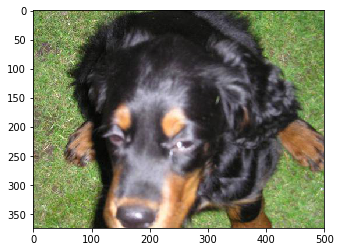

In [97]:
# original data
plt.imshow(img_orig)

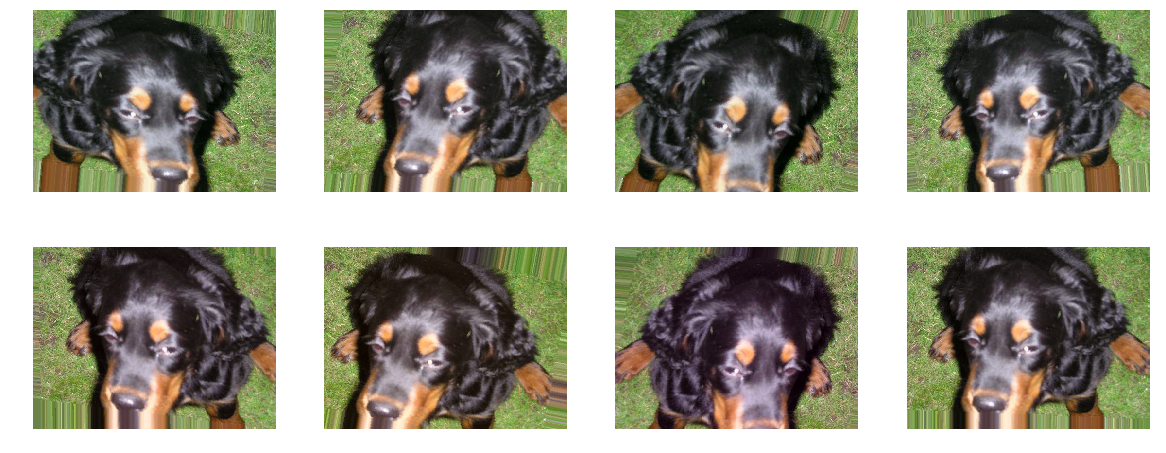

In [98]:
# Augmented data
plots(aug_imgs, (20,8), rows=2)

In [99]:
# Ensure that we return to channels first ordering
K.set_image_data_format('channels_first')

### Adding data augmentation to tune model

In [104]:
vgg = Vgg16BN()
model = vgg.model

In [105]:
batch_size=64

In [106]:
gen = image.ImageDataGenerator(rotation_range=20.0, width_shift_range=0.08, height_shift_range=0.08,
                              shear_range=0.15, zoom_range=0.1, channel_shift_range=10.,
                              horizontal_flip=True)

In [107]:
batches = vgg.get_batches(train_path, gen, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, shuffle=False, batch_size=batch_size)
vgg.finetune(batches)

Found 8222 images belonging to 120 classes.
Found 2000 images belonging to 120 classes.


In [108]:
# make the model trainable for all FC layers
layers = model.layers
last_conv_idx = [idx for idx, layer in enumerate(layers) if type(layer) is Conv2D][-1]
for conv_layer in layers[:last_conv_idx+1]: conv_layer.trainable = False
for fc_layer in layers[last_conv_idx+1:]: fc_layer.trainable = True
vgg.compile()

In [109]:
vgg.fit(batches, val_batches, epochs=1)

Epoch 1/1
 - 148s - loss: 9.3622 - acc: 0.1031 - val_loss: 9.7584 - val_acc: 0.1725


In [110]:
model.optimizer.lr = 1

In [111]:
vgg.fit(batches, val_batches, epochs=5)

Epoch 1/5
 - 146s - loss: 6.3912 - acc: 0.2190 - val_loss: 6.3296 - val_acc: 0.2415
Epoch 2/5
 - 145s - loss: 4.8173 - acc: 0.2976 - val_loss: 5.1215 - val_acc: 0.2935
Epoch 3/5
 - 145s - loss: 4.0222 - acc: 0.3517 - val_loss: 5.0601 - val_acc: 0.2900
Epoch 4/5
 - 145s - loss: 3.7037 - acc: 0.3919 - val_loss: 4.2504 - val_acc: 0.3455
Epoch 5/5
 - 145s - loss: 3.3798 - acc: 0.4267 - val_loss: 4.3789 - val_acc: 0.3355


In [112]:
model.optimizer.lr = 0.1

In [113]:
vgg.fit(batches, val_batches, epochs=10)

Epoch 1/10
 - 146s - loss: 3.0987 - acc: 0.4542 - val_loss: 4.3216 - val_acc: 0.3400
Epoch 2/10
 - 145s - loss: 2.9345 - acc: 0.4744 - val_loss: 3.9840 - val_acc: 0.3490
Epoch 3/10
 - 145s - loss: 2.7299 - acc: 0.5108 - val_loss: 4.0989 - val_acc: 0.3480
Epoch 4/10
 - 145s - loss: 2.7549 - acc: 0.5048 - val_loss: 4.0914 - val_acc: 0.3615
Epoch 5/10
 - 145s - loss: 2.5697 - acc: 0.5280 - val_loss: 4.1170 - val_acc: 0.3680
Epoch 6/10
 - 145s - loss: 2.5500 - acc: 0.5436 - val_loss: 4.1888 - val_acc: 0.3775
Epoch 7/10
 - 145s - loss: 2.6249 - acc: 0.5295 - val_loss: 4.1621 - val_acc: 0.3565
Epoch 8/10
 - 145s - loss: 2.5430 - acc: 0.5404 - val_loss: 3.9297 - val_acc: 0.3815
Epoch 9/10
 - 145s - loss: 2.4428 - acc: 0.5530 - val_loss: 4.1115 - val_acc: 0.3740
Epoch 10/10
 - 145s - loss: 2.3460 - acc: 0.5669 - val_loss: 3.9168 - val_acc: 0.3885


## Add Regularization: Dropout

In [28]:
vgg = Vgg16BN()
model = vgg.model

model_name = 'Vgg16BN'

In [29]:
batch_size=64

In [30]:
gen = image.ImageDataGenerator(rotation_range=20.0, width_shift_range=0.08, height_shift_range=0.08,
                              shear_range=0.15, zoom_range=0.1, channel_shift_range=10.,
                              horizontal_flip=True)

In [31]:
batches = vgg.get_batches(train_path, gen, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, shuffle=False, batch_size=batch_size)
vgg.finetune(batches)

Found 8222 images belonging to 120 classes.
Found 2000 images belonging to 120 classes.


In [32]:
vgg.set_dropout(0.5)

In [33]:
# make the model trainable for all FC layers
layers = model.layers
last_conv_idx = [idx for idx, layer in enumerate(layers) if type(layer) is Conv2D][-1]
for conv_layer in layers[:last_conv_idx+1]: conv_layer.trainable = False
for fc_layer in layers[last_conv_idx+1:]: fc_layer.trainable = True
vgg.compile()

In [34]:
vgg.fit(batches, val_batches, epochs=1)

Epoch 1/1
 - 147s - loss: 9.2612 - acc: 0.1031 - val_loss: 9.6526 - val_acc: 0.2010


In [35]:
model.optimizer.lr = 1

In [36]:
vgg.fit(batches, val_batches, epochs=5)

Epoch 1/5
 - 145s - loss: 6.5123 - acc: 0.2302 - val_loss: 7.6564 - val_acc: 0.2395
Epoch 2/5
 - 145s - loss: 5.3456 - acc: 0.2967 - val_loss: 6.9970 - val_acc: 0.2540
Epoch 3/5
 - 145s - loss: 4.3827 - acc: 0.3450 - val_loss: 5.4080 - val_acc: 0.3005
Epoch 4/5
 - 145s - loss: 3.7373 - acc: 0.4169 - val_loss: 4.5922 - val_acc: 0.3290
Epoch 5/5
 - 145s - loss: 3.2618 - acc: 0.4484 - val_loss: 4.5470 - val_acc: 0.3470


In [37]:
model.optimizer.lr = 0.1

In [38]:
vgg.fit(batches, val_batches, epochs=4)

Epoch 1/12
 - 145s - loss: 3.2219 - acc: 0.4510 - val_loss: 4.2131 - val_acc: 0.3420
Epoch 2/12
 - 145s - loss: 3.0025 - acc: 0.4798 - val_loss: 4.2387 - val_acc: 0.3565
Epoch 3/12
 - 145s - loss: 2.9007 - acc: 0.5014 - val_loss: 4.2917 - val_acc: 0.3735
Epoch 4/12
 - 145s - loss: 2.6941 - acc: 0.5256 - val_loss: 3.7609 - val_acc: 0.4070
Epoch 5/12
 - 145s - loss: 2.5632 - acc: 0.5462 - val_loss: 3.9232 - val_acc: 0.3920
Epoch 6/12
 - 145s - loss: 2.4361 - acc: 0.5546 - val_loss: 4.0527 - val_acc: 0.3850
Epoch 7/12
 - 144s - loss: 2.5383 - acc: 0.5496 - val_loss: 4.1459 - val_acc: 0.3975
Epoch 8/12
 - 145s - loss: 2.3170 - acc: 0.5773 - val_loss: 4.0119 - val_acc: 0.3730
Epoch 9/12
 - 145s - loss: 2.3496 - acc: 0.5848 - val_loss: 4.3009 - val_acc: 0.3725
Epoch 10/12
 - 145s - loss: 2.2927 - acc: 0.5933 - val_loss: 3.8255 - val_acc: 0.4205
Epoch 11/12
 - 145s - loss: 2.2265 - acc: 0.6012 - val_loss: 4.2601 - val_acc: 0.3880
Epoch 12/12
 - 145s - loss: 2.3096 - acc: 0.5969 - val_loss: 4.

In [39]:
model.optimizer.lr = 0.01

In [40]:
vgg.fit(batches, val_batches, epochs=10)

Epoch 1/10
 - 146s - loss: 2.2430 - acc: 0.6002 - val_loss: 3.8521 - val_acc: 0.4040
Epoch 2/10
 - 145s - loss: 2.1619 - acc: 0.6216 - val_loss: 4.2110 - val_acc: 0.4020
Epoch 3/10
 - 144s - loss: 2.0130 - acc: 0.6388 - val_loss: 3.8505 - val_acc: 0.4065
Epoch 4/10
 - 144s - loss: 1.9954 - acc: 0.6440 - val_loss: 3.7444 - val_acc: 0.4070
Epoch 5/10
 - 145s - loss: 2.0498 - acc: 0.6337 - val_loss: 4.0495 - val_acc: 0.4155
Epoch 6/10
 - 144s - loss: 2.0817 - acc: 0.6373 - val_loss: 4.1307 - val_acc: 0.4045
Epoch 7/10
 - 144s - loss: 2.0734 - acc: 0.6371 - val_loss: 4.1062 - val_acc: 0.4085
Epoch 8/10
 - 144s - loss: 2.0038 - acc: 0.6412 - val_loss: 4.4285 - val_acc: 0.3930
Epoch 9/10
 - 144s - loss: 1.9894 - acc: 0.6554 - val_loss: 4.2515 - val_acc: 0.4080
Epoch 10/10
 - 144s - loss: 1.9576 - acc: 0.6530 - val_loss: 4.0351 - val_acc: 0.4325


In [41]:
model.optimizer.lr = 0.001

In [42]:
vgg.fit(batches, val_batches, epochs=5)

Epoch 1/5
 - 145s - loss: 1.9960 - acc: 0.6543 - val_loss: 4.3043 - val_acc: 0.4180
Epoch 2/5
 - 145s - loss: 1.8503 - acc: 0.6802 - val_loss: 4.1706 - val_acc: 0.4185
Epoch 3/5
 - 144s - loss: 1.7328 - acc: 0.6898 - val_loss: 4.3849 - val_acc: 0.4130
Epoch 4/5
 - 144s - loss: 1.7986 - acc: 0.6933 - val_loss: 4.2219 - val_acc: 0.4275
Epoch 5/5
 - 144s - loss: 1.7825 - acc: 0.6885 - val_loss: 4.2808 - val_acc: 0.4155


In [47]:
model.save_weights(model_path + model_name + '-aug-dropout-0.5.h5')

## Method 2: Pretrain Convolution Layers to speed up training


<font color='red'>
** Notice that here because we use this BatchNormalization dense layers based on pretrained convolution layers, we can not use Data Augmentation, because with Data Augmentation the output of pretrained convolution layers will be different every time. **
</font>

In [5]:
batch_size=64

In [6]:
vgg = Vgg16BN()
model = vgg.model

vgg.finetune(vgg.get_batches(train_path, shuffle=False, batch_size=batch_size))

Found 8222 images belonging to 120 classes.


In [7]:
conv_model, fc_model = vgg.get_split_models()

In [23]:
"""
vgg_conv = Vgg16BN(include_top=False)
conv_model = vgg_conv.model

conv_model_name = 'Vgg16BN_conv'
"""

### 2.1 Let's pretrain the conv_model first (or load conv_model train features)

In [14]:
batches = get_batches(train_path, shuffle=False, batch_size=batch_size)
val_batches = get_batches(valid_path, shuffle=False, batch_size=batch_size)

trn_classes = batches.classes
val_classes = val_batches.classes
trn_labels = onehot(trn_classes)
val_labels = onehot(val_classes)

Found 8222 images belonging to 120 classes.
Found 2000 images belonging to 120 classes.


In [10]:
trn_features = conv_model.predict_generator(batches, steps=int(math.ceil(batches.n/batches.batch_size)))
val_features = conv_model.predict_generator(val_batches, steps=int(math.ceil(val_batches.n/val_batches.batch_size)))

In [11]:
save_array(model_path+'train_convlayer_features.bc', trn_features)
save_array(model_path+'valid_convlayer_features.bc', val_features)

In [11]:
trn_features = load_array(model_path+'train_convlayer_features.bc')
val_features = load_array(model_path+'valid_convlayer_features.bc')

In [12]:
trn_features.shape

(8222, 512, 7, 7)

In [29]:
val_features.shape

(2000, 512, 7, 7)

### 2.2 Start training FC model

In [43]:
fc_model.layers[0].input_shape

(None, 512, 7, 7)

In [35]:
"""
def get_fc_model():
    flatten_idx = [idx for idx, layer in enumerate(vgg.model.layers) if type(layer)==Flatten][0]
    model = Sequential([
        Flatten(input_shape=conv_model.layers[-1].output_shape[1:])
    ])
    for layer in vgg.model.layers[flatten_idx+1:]: model.add(layer)
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    

fc_model = get_fc_model()
"""

In [37]:
fc_model.fit(trn_features, trn_labels, batch_size=batch_size, epochs=2, 
             validation_data= (val_features, val_labels), verbose=2)

Train on 8222 samples, validate on 2000 samples
Epoch 1/2
 - 21s - loss: 9.0182 - acc: 0.1331 - val_loss: 9.7716 - val_acc: 0.2090
Epoch 2/2
 - 20s - loss: 4.7970 - acc: 0.4206 - val_loss: 6.8554 - val_acc: 0.2700


In [38]:
fc_model.lr = 0.1

In [39]:
fc_model.fit(trn_features, trn_labels, batch_size=batch_size, epochs=3, 
             validation_data= (val_features, val_labels), verbose=2)

Train on 8222 samples, validate on 2000 samples
Epoch 1/3
 - 20s - loss: 3.0430 - acc: 0.6079 - val_loss: 6.7004 - val_acc: 0.2885
Epoch 2/3
 - 20s - loss: 2.2344 - acc: 0.7093 - val_loss: 6.5550 - val_acc: 0.3150
Epoch 3/3
 - 20s - loss: 1.7094 - acc: 0.7678 - val_loss: 6.7303 - val_acc: 0.3305


In [21]:
fc_model.lr = 0.01

In [22]:
fc_model.fit(trn_features, trn_labels, batch_size=batch_size, epochs=3, 
             validation_data= (val_features, val_labels), verbose=2)

Train on 8222 samples, validate on 2000 samples
Epoch 1/3
 - 20s - loss: 0.2781 - acc: 0.9330 - val_loss: 5.4981 - val_acc: 0.3165
Epoch 2/3
 - 20s - loss: 0.2527 - acc: 0.9400 - val_loss: 5.6127 - val_acc: 0.3200
Epoch 3/3
 - 20s - loss: 0.2205 - acc: 0.9476 - val_loss: 5.9161 - val_acc: 0.3080


In [40]:
fc_model.lr = 0.001

In [41]:
fc_model.fit(trn_features, trn_labels, batch_size=batch_size, epochs=8, 
             validation_data= (val_features, val_labels), verbose=2)

Train on 8222 samples, validate on 2000 samples
Epoch 1/3
 - 20s - loss: 1.4768 - acc: 0.8020 - val_loss: 6.6654 - val_acc: 0.3355
Epoch 2/3
 - 20s - loss: 1.1945 - acc: 0.8410 - val_loss: 6.4875 - val_acc: 0.3415
Epoch 3/3
 - 20s - loss: 1.0332 - acc: 0.8596 - val_loss: 6.6173 - val_acc: 0.3580


### 2.3 Training FC model by adding Regularization: Dropout

In [8]:
vgg.set_dropout(0.5)

In [9]:
_, fc_model = vgg.get_split_models()

In [15]:
fc_model.fit(trn_features, trn_labels, batch_size=batch_size, epochs=2, 
             validation_data= (val_features, val_labels), verbose=2)

Train on 8222 samples, validate on 2000 samples
Epoch 1/2
 - 21s - loss: 8.9120 - acc: 0.1304 - val_loss: 9.4935 - val_acc: 0.1930
Epoch 2/2
 - 20s - loss: 4.6512 - acc: 0.4174 - val_loss: 6.6435 - val_acc: 0.2745


In [16]:
fc_model.lr = 0.1

In [17]:
fc_model.fit(trn_features, trn_labels, batch_size=batch_size, epochs=3, 
             validation_data= (val_features, val_labels), verbose=2)

Train on 8222 samples, validate on 2000 samples
Epoch 1/3
 - 20s - loss: 2.9795 - acc: 0.6019 - val_loss: 6.2858 - val_acc: 0.3090
Epoch 2/3
 - 20s - loss: 2.1784 - acc: 0.7052 - val_loss: 5.8478 - val_acc: 0.3240
Epoch 3/3
 - 20s - loss: 1.7081 - acc: 0.7700 - val_loss: 5.7128 - val_acc: 0.3380


In [18]:
fc_model.lr = 0.01

In [19]:
fc_model.fit(trn_features, trn_labels, batch_size=batch_size, epochs=5, 
             validation_data= (val_features, val_labels), verbose=2)

Train on 8222 samples, validate on 2000 samples
Epoch 1/8
 - 20s - loss: 1.3378 - acc: 0.8146 - val_loss: 6.3276 - val_acc: 0.3325
Epoch 2/8
 - 20s - loss: 1.2468 - acc: 0.8284 - val_loss: 6.5239 - val_acc: 0.3335
Epoch 3/8
 - 20s - loss: 1.0564 - acc: 0.8560 - val_loss: 6.7737 - val_acc: 0.3290
Epoch 4/8
 - 20s - loss: 0.9921 - acc: 0.8638 - val_loss: 6.5592 - val_acc: 0.3600
Epoch 5/8
 - 20s - loss: 0.8607 - acc: 0.8818 - val_loss: 6.5293 - val_acc: 0.3675
Epoch 6/8
 - 20s - loss: 0.8276 - acc: 0.8887 - val_loss: 6.6971 - val_acc: 0.3515
Epoch 7/8
 - 20s - loss: 0.7617 - acc: 0.8992 - val_loss: 6.7203 - val_acc: 0.3535
Epoch 8/8
 - 20s - loss: 0.7846 - acc: 0.8959 - val_loss: 7.1291 - val_acc: 0.3460


In [20]:
fc_model.lr = 0.001

In [21]:
fc_model.fit(trn_features, trn_labels, batch_size=batch_size, epochs=8, 
             validation_data= (val_features, val_labels), verbose=2)

Train on 8222 samples, validate on 2000 samples
Epoch 1/8
 - 20s - loss: 0.6829 - acc: 0.9091 - val_loss: 6.8973 - val_acc: 0.3640
Epoch 2/8
 - 20s - loss: 0.7062 - acc: 0.9081 - val_loss: 7.0263 - val_acc: 0.3575
Epoch 3/8
 - 20s - loss: 0.6500 - acc: 0.9119 - val_loss: 7.4112 - val_acc: 0.3260
Epoch 4/8
 - 20s - loss: 0.6707 - acc: 0.9156 - val_loss: 7.2319 - val_acc: 0.3585
Epoch 5/8
 - 20s - loss: 0.6205 - acc: 0.9166 - val_loss: 7.3562 - val_acc: 0.3540
Epoch 6/8
 - 20s - loss: 0.6015 - acc: 0.9242 - val_loss: 7.5190 - val_acc: 0.3520
Epoch 7/8
 - 20s - loss: 0.5826 - acc: 0.9256 - val_loss: 7.4617 - val_acc: 0.3575
Epoch 8/8
 - 20s - loss: 0.6386 - acc: 0.9217 - val_loss: 7.6444 - val_acc: 0.3480


In [22]:
model_name = 'Vgg16BN'
sub_model_name = 'fc-model'
fc_model.save_weights(model_path + model_name + '_' + sub_model_name +  '_dropout-0.5.h5')